In [1]:
import sys
import scanpy as sc 
import numpy as np

sys.path.append('/home/jupyter/data/PlastiNet_v2')

# plotting functions 
from plastinet.data.data_loader import create_data_objects

from plastinet.visualization.plots import plot_continous_obs, plot_tissue, plot_composition_dot_plot, plot_expression

/home/jupyter/mambaforge/envs/plastiNet/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/jupyter/mambaforge/envs/plastiNet/lib/python3.8/site-packages/torch_geometric/typing.py:110: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: 
object has no attribute sparse_csc_tensor:
  File "/home/jupyter/mambaforge/envs/plastiNet/lib/python3.8/site-packages/torch_sparse/tensor.py", line 585
            value = torch.ones(self.nnz(), dtype=dtype, device=self.device())
    
        return torch.sparse_csc_tensor(colptr, row, value, self.sizes())
               ~~~~~~~~~~~~~~~~~~~~~~~ <--- HERE

  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "


In [65]:
# adata = sc.read_h5ad("../multi_radial_adata.h5ad")
# adata

adata = sc.read_h5ad("../../../PDAC/GAT_HMM/Validation_of_GAT/CosMx Intestine/exp_clustered.h5ad")
adata = adata[adata.obs["sample_source"] == "HC_b_"]
# adata = adata[adata.obs["fov"].isin([6, 7])]

In [66]:
adata

View of AnnData object with n_obs × n_vars = 54772 × 980
    obs: 'fov', 'cell_ID', 'Area', 'AspectRatio', 'CenterX_local_px', 'CenterY_local_px', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD45', 'Max.CD45', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'sample_source', 'subset', 'fine_type', 'n_genes', 'leiden_0.1', 'leiden_0.2', 'leiden_0.3', 'leiden_0.4', 'X', 'Y'
    uns: 'fine_type_colors', 'leiden', 'log1p', 'neighbors', 'pca', 'sample_source_colors', 'subset_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [67]:
spatial_coords = np.array([adata.obs["X"], adata.obs["Y"]]).T
adata.obsm["spatial"] = spatial_coords

# adata.obs['X'] = adata.obsm['spatial'][:, 0]  # X coordinate
# adata.obs['Y'] = adata.obsm['spatial'][:, 1]  # Y coordinate
# adata

In [68]:
adata.obs["sample_source"] = [0 for x in adata.obs.index]

In [69]:
# X_min = adata.X.min(axis=0)
# X_max = adata.X.max(axis=0)

# # Avoid division by zero for features where max equals min
# X_range = X_max - X_min
# X_range[X_range == 0] = 1  # Set the range to 1 where the max equals min to prevent division by zero

# # Apply min-max normalization
# adata.X = (adata.X - X_min) / X_range

In [ ]:
# NOTE CHECK 
# check the scale of the different loss components to make sure they are on the same scale 

In [ ]:
import importlib
import torch
from torch_geometric.data import DataLoader

from plastinet.models import plastinet_model
from plastinet.data import data_loader, graph_utils

importlib.reload(plastinet_model)
importlib.reload(data_loader)
importlib.reload(graph_utils)

from plastinet.models.plastinet_model import PlastiNet
from plastinet.data.data_loader import create_data_objects
from plastinet.data.graph_utils import graph_alpha, sparse_mx_to_torch_edge_list, graph_to_sparse_matrix

# plastinet = PlastiNet(adata, sample_key="sample_source", radius=10, z_dim=10, epochs=5, spatial_reg=0.2)

plastinet = PlastiNet(adata, sample_key="sample_source", radius=250, z_dim=50, epochs=5, spatial_reg=0.2)

plastinet.run_gat()

/home/jupyter/mambaforge/envs/plastiNet/lib/python3.8/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
adata

In [ ]:
embedding_adata = plastinet.embedding_adata

In [ ]:
embedding_adata

In [ ]:
# sc.pp.neighbors(embedding_adata, use_rep='X') 
# sc.tl.umap(embedding_adata)
sc.tl.leiden(embedding_adata, resolution=0.4)
sc.pl.umap(embedding_adata, color = "leiden")

In [ ]:
embedding_adata.obs["subset"] = adata.obs["subset"]
sc.pl.umap(embedding_adata, color = "subset")
plot_tissue(embedding_adata, "leiden")

In [ ]:
plot_tissue(embedding_adata, "leiden")

In [15]:
# embedding_adata.obs["subset"] = adata.obs["subset"]
# sc.pl.umap(embedding_adata, color = "subset")

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 3., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0.01088549, 0.01173479, 0.01258408, 0.01343337, 0.01428266,
        0.01513196, 0.01598125, 0.01683054, 0.01767983, 0.01852913,
        0.01937842]),
 <a list of 980 BarContainer objects>)

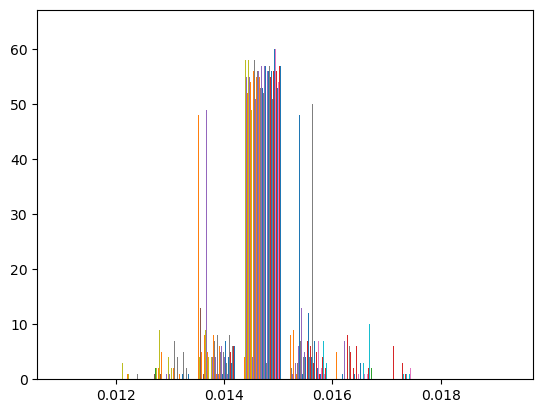

In [63]:
import matplotlib.pyplot as plt

plt.hist(plastinet.neighbor_attn_weights[5])


In [64]:
plastinet.neighbor_attn_weights[5].max()

0.019378418